# Imports

In [ ]:
import pandas as pd
import json
from datetime import datetime
import plotly.express as px
from pathlib import Path
import sys
from matplotlib.pyplot import ScalarFormatter
from asapdiscovery.data.readers.molfile import MolFileFactory
from harbor.analysis.cross_docking import DockingDataModel
import harbor.analysis.cross_docking as cd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
data = cd.DockingDataModel.deserialize("/Users/alexpayne/Scientific_Projects/mers-drug-discovery/sars2-retrospective-analysis/full_cross_dock_v2_combined_results/ALL_50_poses.parquet")

# Run analysis

In [ ]:
from importlib import reload
reload(cd)
# n_refs = cd.generate_logarithmic_scale(len(refs_to_use))
evs = []
ref_structure_column = "Reference_Structure"
scorers = [cd.POSITScorer(variable='PoseData_docking-confidence-POSIT'),
           cd.RMSDScorer(variable='PoseData_RMSD', cutoff=2),]
dataset_splits = [cd.DateSplit(date_column="RefData_Date",
                               randomize_by_n_days=1,
                               reference_structure_column=ref_structure_column),
                  cd.RandomSplit(reference_structure_column=ref_structure_column,)]  

In [ ]:
n_refs = cd.generate_logarithmic_scale(403, )

In [ ]:
n_refs

In [ ]:
# for scorer in scorers:
#     for dataset_split in dataset_splits:
#         for n in n_refs:
#             ev = cd.Evaluator(
#                           scorer=scorer,
#                           evaluator=cd.BinaryEvaluation(variable="PoseData_RMSD", cutoff=2),
#                 n_bootstraps=1,)
#             ev.dataset_split = dataset_split
#             ev.dataset_split.n_reference_structures = n
#             evs.append(ev)  

In [ ]:
# results = cd.Results.calculate_results(data, evs)

# Try just one pose comparison

In [ ]:
reload(cd)
evs = []
for n_poses in [1, 25, 50]:
    for n_ref in n_refs:
        ev = cd.Evaluator(
            pose_selector = cd.PoseSelector(name="PoseSelector", variable="Pose_ID", number_to_return=n_poses),
            dataset_split = cd.DateSplit(
                date_column="RefData_Date",
                randomize_by_n_days=1,
                reference_structure_column=ref_structure_column,
            ),
            scorer=cd.RMSDScorer(variable='PoseData_RMSD', cutoff=2),
            evaluator=cd.BinaryEvaluation(variable="PoseData_RMSD", cutoff=2),
            n_bootstraps=1,
        )
        ev.dataset_split.n_reference_structures = n_ref
        evs.append(ev)

In [ ]:
evs[0]

In [ ]:
evs[0].to_json_file("test_evaluator.json")

In [ ]:
bytes_to_gigabytes_factor = 1024 ** 3

In [13]:
print(f"Data size: {sys.getsizeof(data.dataframe) / bytes_to_gigabytes_factor} GB")

Data size: 3.130316970869899 GB


In [14]:
results = cd.Results.calculate_results(data, evs)

100%|██████████| 27/27 [04:44<00:00, 10.52s/it]


In [15]:
results_df = cd.Results.df_from_results(results)

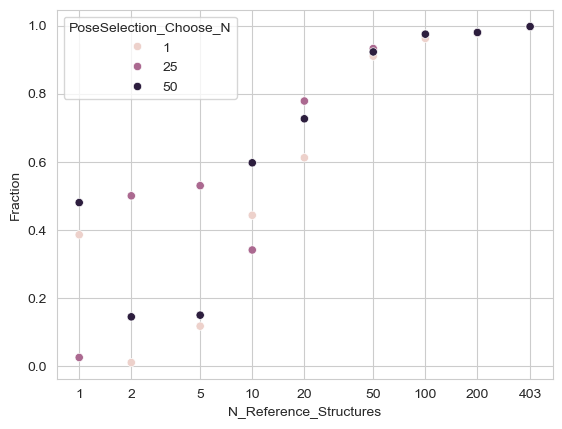

In [16]:
fig = sns.scatterplot(data=results_df, 
                     x="N_Reference_Structures", 
                     y="Fraction", 
                     hue="PoseSelection_Choose_N",
                     )
# Customize each subplot
fig.set_xscale("log")
fig.xaxis.set_major_formatter(ScalarFormatter())

custom_ticks = n_refs
fig.set_xticks(custom_ticks)

In [17]:
reload(cd)
evs = []
for n_poses in [50]:
    for n_ref in [403]:
        ev = cd.Evaluator(
            pose_selector = cd.PoseSelector(name="PoseSelector", variable="Pose_ID", number_to_return=n_poses),
            dataset_split = cd.DateSplit(
                date_column="RefData_Date",
                randomize_by_n_days=1,
                reference_structure_column=ref_structure_column,
            ),
            scorer=cd.RMSDScorer(variable='PoseData_RMSD', cutoff=2),
            evaluator=cd.BinaryEvaluation(variable="PoseData_RMSD", cutoff=2),
            n_bootstraps=100,
        )
        ev.dataset_split.n_reference_structures = n_ref
        evs.append(ev)

In [18]:
evs[0].to_json_file("test_evaluator.json")

'test_evaluator.json'